In [1]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/Hyperparameter_Tuning_in_Python/datasets/'
import pandas as pd
import numpy as np

In [2]:
results_df = pd.read_csv(path_data + 'results_df.csv').drop(columns = ['Unnamed: 0'])
results_df.head()

,max_depth,min_samples_leaf,learn_rate,accuracy
0,4,16,0.624362,95
1,10,14,0.477450,97
2,7,14,0.050067,96
3,5,12,0.023356,96
4,6,12,0.771275,97


In [3]:
combinations_list = pd.read_csv(path_data + 'combinations_list.csv').drop(columns = ['Unnamed: 0']).values
combinations_list

array([[1.00000000e+00, 3.00000000e+00, 1.00000000e-02],
       [1.00000000e+00, 3.00000000e+00, 2.33557047e-02],
       [1.00000000e+00, 3.00000000e+00, 3.67114094e-02],
       ...,
       [5.00000000e+00, 1.30000000e+01, 1.30550336e+00],
       [5.00000000e+00, 1.30000000e+01, 1.31885906e+00],
       [5.00000000e+00, 1.30000000e+01, 1.33221477e+00]])

In [4]:
import matplotlib.pyplot as plt
def visualize_hyperparameter(name):
  plt.clf()
  plt.scatter(results_df[name],results_df['accuracy'], c=['blue']*500)
  plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
  plt.gca().set_ylim([0,100])
  plt.show()

10000
    max_depth  min_samples_leaf  learn_rate  accuracy
1          10                14    0.477450        97
4           6                12    0.771275        97
2           7                14    0.050067        96
3           5                12    0.023356        96
5          13                11    0.290470        96
6           6                10    0.317181        96
7          19                10    0.757919        96
8           2                16    0.931544        96
9          16                13    0.904832        96
10         12                13    0.891477        96
Index(['max_depth', 'min_samples_leaf', 'learn_rate', 'accuracy'], dtype='object')


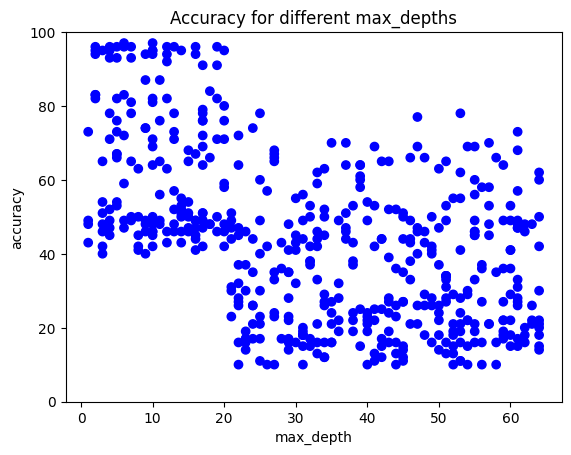

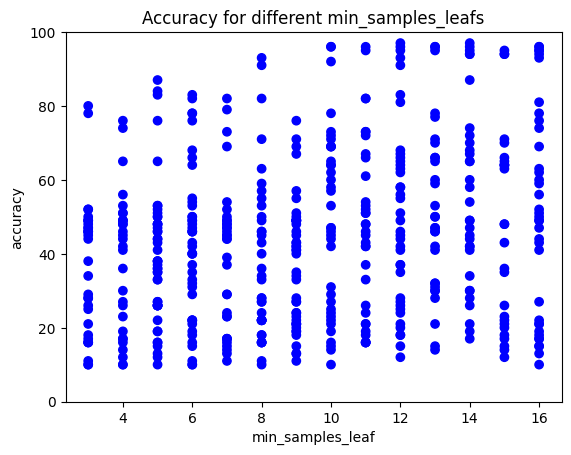

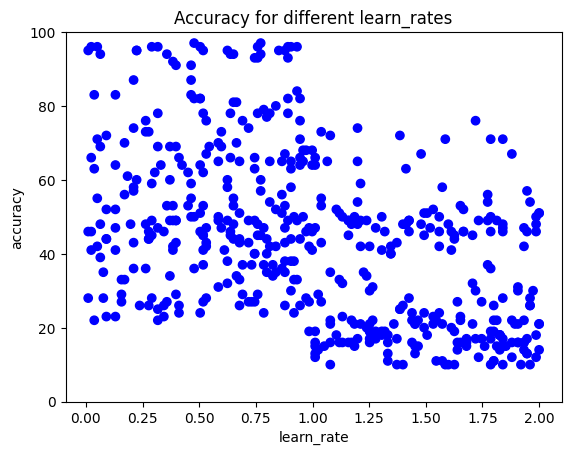

"\nGreat stuff! We have undertaken the first step of a Coarse to Fine search. Results clearly seem better when max_depth is below 20. learn_rates smaller than 1 seem to perform well too. There is not a strong trend for min_samples leaf though. Let's use this in the next exercise!\n"

In [5]:
# exercise 01

"""
Visualizing Coarse to Fine

You're going to undertake the first part of a Coarse to Fine search. This involves analyzing the results of an initial random search that took place over a large search space, then deciding what would be the next logical step to make your hyperparameter search finer.

You have available:

    combinations_list - a list of the possible hyperparameter combinations the random search was undertaken on.
    results_df - a DataFrame that has each hyperparameter combination and the resulting accuracy of all 500 trials. Each hyperparameter is a column, with the header the hyperparameter name.
    visualize_hyperparameter() - a function that takes in a column of the DataFrame (as a string) and produces a scatter plot of this column's values compared to the accuracy scores. An example call of the function would be visualize_hyperparameter('accuracy')

If you wish to view the visualize_hyperparameter() function definition, you can run this code:

import inspect
print(inspect.getsource(visualize_hyperparameter))

"""

# Instructions

"""

    Confirm (by printing out) the size of the combinations_list, justifying the need to start with a random search.
    Sort the results_df by accuracy values and print the top 10 rows. Are there clear insights? Beware a small sample size!
    Confirm (by printing out) which hyperparameters were used in this search. These are the column names in results_df.
    Call visualize_hyperparameter() with each hyperparameter in turn (max_depth, min_samples_leaf, learn_rate). Are there any trends?

"""

# solution

# Confirm the size of the combinations_list
print(len(combinations_list))

# Sort the results_df by accuracy and print the top 10 rows
print(results_df.sort_values(by='accuracy', ascending=False).head(10))

# Confirm which hyperparameters were used in this search
print(results_df.columns)

# Call visualize_hyperparameter() with each hyperparameter in turn
visualize_hyperparameter('max_depth')
visualize_hyperparameter('min_samples_leaf')
visualize_hyperparameter('learn_rate')

#----------------------------------#

# Conclusion

"""
Great stuff! We have undertaken the first step of a Coarse to Fine search. Results clearly seem better when max_depth is below 20. learn_rates smaller than 1 seem to perform well too. There is not a strong trend for min_samples leaf though. Let's use this in the next exercise!
"""

In [6]:
def visualize_first():
  for name in results_df.columns[0:2]:
    plt.clf()
    plt.scatter(results_df[name],results_df['accuracy'], c=['blue']*500)
    plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
    plt.gca().set_ylim([0,100])
    x_line = 20
    if name == "learn_rate":
      	x_line = 1
    plt.axvline(x=x_line, color="red", linewidth=4)
    plt.show() 

In [7]:
def visualize_second():
  for name in results_df2.columns[0:2]:
    plt.clf()
    plt.scatter(results_df2[name],results_df2['accuracy'], c=['blue']*1000)
    plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
    plt.gca().set_ylim([0,100])
    plt.show()

In [8]:
results_df2 = pd.read_csv(path_data + 'results_df2.csv').drop(columns = ['Unnamed: 0'])
results_df2.head()

,max_depth,learn_rate,accuracy
0,1,0.001000,89
1,1,0.021388,78
2,1,0.041776,59
3,1,0.062163,69
4,1,0.082551,68


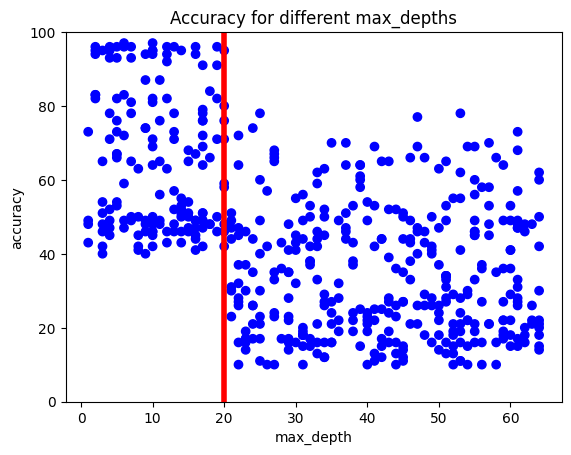

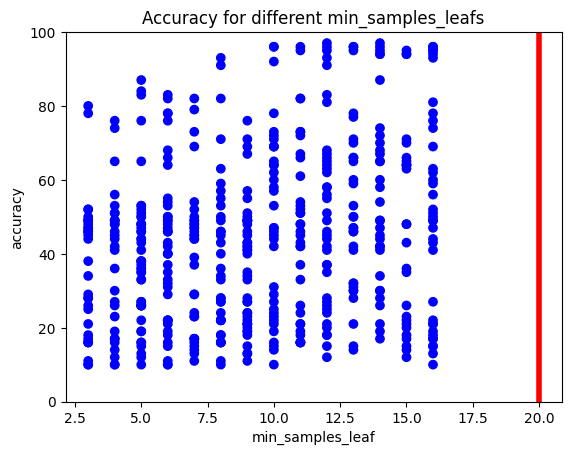

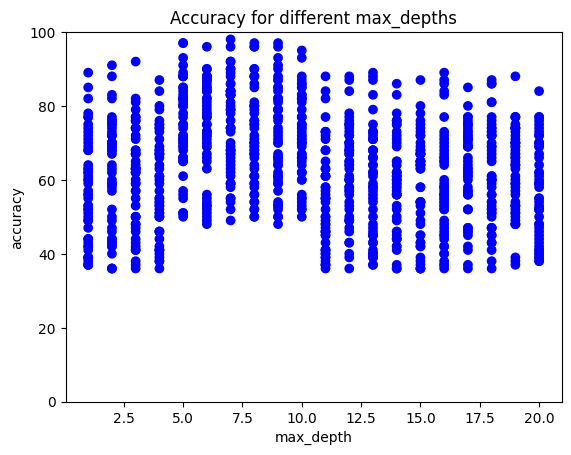

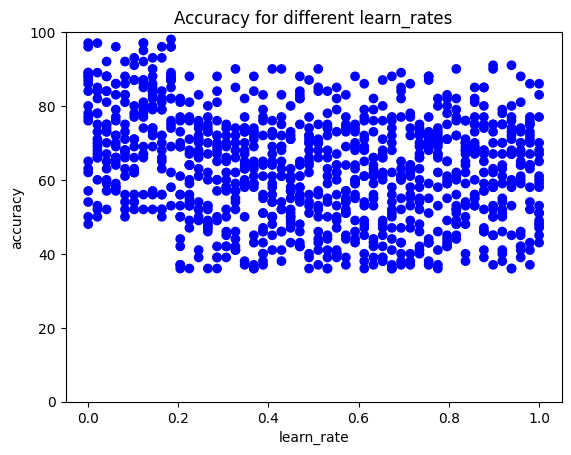

'\nExcellent! You can see in the second example our results are all generally higher. There also appears to be a bump around max_depths between 5 and 10 as well as learn_rate less than 0.2 so perhaps there is even more room for improvement!\n'

In [9]:
# exercise 02

"""
Coarse to Fine Iterations

You will now visualize the first random search undertaken, construct a tighter grid and check the results. You will have available:

    results_df - a DataFrame that has the hyperparameter combination and the resulting accuracy of all 500 trials. Only the hyperparameters that had the strongest visualizations from the previous exercise are included (max_depth and learn_rate)
    visualize_first() - This function takes no arguments but will visualize each of your hyperparameters against accuracy for your first random search.

If you wish to view the visualize_first() (or the visualize_second()) function definition, you can run this code:

import inspect
print(inspect.getsource(visualize_first))

"""

# Instructions

"""
Use the visualize_first() function to check the values of max_depth and learn_rate that tend to perform better. A convenient red line will be added to make this explicit.
---
Now create a more narrow grid search, testing for max_depth values between 1 and 20 and for 50 learning rates between 0.001 and 1.
---
We ran the 1,000 model grid search in the background based on those new combinations. Now use the visualize_second() function to visualize the second iteration (grid search) and see if there is any improved results. This function takes no arguments, just run it in-place to generate the plots!
"""

# solution

# Use the provided function to visualize the first results
visualize_first()

# Create some combinations lists & combine:
max_depth_list = list(range(1,21))
learn_rate_list = np.linspace(0.001,1,50)

# Call the function to visualize the second results
visualize_second()

#----------------------------------#

# Conclusion

"""
Excellent! You can see in the second example our results are all generally higher. There also appears to be a bump around max_depths between 5 and 10 as well as learn_rate less than 0.2 so perhaps there is even more room for improvement!
"""

In [19]:
# exercise 03

"""
Bayes Rule in Python

In this exercise you will undertake a practical example of setting up Bayes formula, obtaining new evidence and updating your 'beliefs' in order to get a more accurate result. The example will relate to the likelihood that someone will close their account for your online software product.

Formula:
    P(A | B) = (P(B | A) * P(A)) / P(B)

These are the probabilities we know:

    7% (0.07) of people are likely to close their account next month
    15% (0.15) of people with accounts are unhappy with your product (you don't know who though!)
    35% (0.35) of people who are likely to close their account are unhappy with your product

"""

# Instructions

"""

    Assign the different probabilities (as decimals) to variables. p_unhappy is the likelihood someone is unhappy, p_unhappy_close is the probability that someone is unhappy with the product, given they are going to close their account.
---

    Assign the probability that someone will close their account next month to the variable p_close as a decimal.
---

    You interview one of your customers and discover they are unhappy. What is the probability they will close their account, now that you know this evidence? Assign the result to p_close_unhappy and print it.

"""

# solution

# Assign probabilities to variables 
p_unhappy = 0.15
p_unhappy_close = 0.35

# Probabiliy someone will close
p_close = 0.07

# Probability unhappy person will close
p_close_unhappy = (p_unhappy_close * p_close) / p_unhappy
print(p_close_unhappy)

#----------------------------------#

# Conclusion

"""
Nice work! You correctly were able to frame this problem in a Bayesian way, and update your beliefs using new evidence. There's a 16.3% chance that a customer, given that they are unhappy, will close their account. Next we'll use a package which uses this methodology to automatically tune hyperparameters for us.
"""

0.16333333333333336


"\nNice work! You correctly were able to frame this problem in a Bayesian way, and update your beliefs using new evidence. There's a 16.3% chance that a customer, given that they are unhappy, will close their account. Next we'll use a package which uses this methodology to automatically tune hyperparameters for us.\n"

In [32]:
from hyperopt import hp, fmin, tpe
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [21]:
data = pd.read_csv(path_data + 'credit_card_with_cats.csv').drop(columns = ['Unnamed: 0'])
data.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,1,0,0,0,0,0,1,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,1,0,0,0,0,0,0,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,0,1,0,0,0,0,0,0,1,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,0,1,0,0,0,0,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,0,1,0,0,0,0,0,1,0,0


In [22]:
X = data.drop('default payment next month', axis = 1)
y = data['default payment next month']

X.shape, y.shape

((30000, 33), (30000,))

In [23]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3)


In [33]:
# exercise 04

"""
Bayesian Hyperparameter tuning with Hyperopt

In this example you will set up and run a Bayesian hyperparameter optimization process using the package Hyperopt (already imported as hp for you). You will set up the domain (which is similar to setting up the grid for a grid search), then set up the objective function. Finally, you will run the optimizer over 20 iterations.

You will need to set up the domain using values:

    max_depth using quniform distribution (between 2 and 10, increasing by 2)
    learning_rate using uniform distribution (0.001 to 0.9)

Note that for the purpose of this exercise, this process was reduced in data sample size and hyperopt & GBM iterations. If you are trying out this method by yourself on your own machine, try a larger search space, more trials, more cvs and a larger dataset size to really see this in action!
"""

# Instructions

"""

    Set up a space dictionary using the domain mentioned above.
    Set up the objective function using a gradient boosting classifier.
    Run the algorithm for 20 evaluations (just use the default, suggested algorithm from the slides).

"""

# solution

# Set up space dictionary with specified hyperparameters
space = {'max_depth': hp.quniform('max_depth', 2, 10, 2),'learning_rate': hp.uniform('learning_rate', 0.001,0.9)}

# Set up objective function
def objective(params):
    params = {'max_depth': int(params['max_depth']),'learning_rate': params['learning_rate']}
    gbm_clf = GradientBoostingClassifier(n_estimators=100, **params) 
    best_score = cross_val_score(gbm_clf, X_train, y_train, scoring='accuracy', cv=2, n_jobs=4).mean()
    loss = 1 - best_score
    return loss

# Run the algorithm
best = fmin(fn=objective,space=space, max_evals=20, rstate=np.random.default_rng(42), algo=tpe.suggest)
print(best)

#----------------------------------#

# Conclusion

"""
Excellent! You succesfully built your first Bayesian hyperparameter tuning algorithm. This will be a very powerful tool for your machine learning modeling in future. Bayesian hyperparameter tuning is a new and popular method so this first taster is a valuable thing to gain experience in. You are highly encouraged to extend this example on your own!
"""

100%|██████████| 20/20 [07:31<00:00, 22.56s/trial, best loss: 0.17833333333333334]
{'learning_rate': 0.038093061276450534, 'max_depth': 2.0}


'\nExcellent! You succesfully built your first Bayesian hyperparameter tuning algorithm. This will be a very powerful tool for your machine learning modeling in future. Bayesian hyperparameter tuning is a new and popular method so this first taster is a valuable thing to gain experience in. You are highly encouraged to extend this example on your own!\n'

In [35]:
from tpot import TPOTClassifier

In [36]:
# exercise 05

"""
Genetic Hyperparameter Tuning with TPOT

You're going to undertake a simple example of genetic hyperparameter tuning. TPOT is a very powerful library that has a lot of features. You're just scratching the surface in this lesson, but you are highly encouraged to explore in your own time.

This is a very small example. In real life, TPOT is designed to be run for many hours to find the best model. You would have a much larger population and offspring size as well as hundreds more generations to find a good model.

You will create the estimator, fit the estimator to the training data and then score this on the test data.

For this example we wish to use:

    3 generations
    4 in the population size
    3 offspring in each generation
    accuracy for scoring

A random_state of 2 has been set for consistency of results.
"""

# Instructions

"""

    Assign the values outlined in the context to the inputs for tpot_clf.
    Create the tpot_clf classifier with the correct inputs.
    Fit the classifier to the training data (X_train & y_train are available in your workspace).
    Use the fitted classifier to score on the test set (X_test & y_test are available in your workspace).

"""

# solution

# Assign the values outlined to the inputs
number_generations = 3
population_size = 4
offspring_size = 3
scoring_function = 'accuracy'

# Create the tpot classifier
tpot_clf = TPOTClassifier(generations=number_generations, population_size=population_size,
                          offspring_size=offspring_size, scoring=scoring_function,
                          verbosity=2, random_state=2, cv=2)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))

#----------------------------------#

# Conclusion

"""
Nice work! You can see in the output the score produced by the chosen model (in this case a version of Naive Bayes) over each generation, and then the final accuracy score with the hyperparameters chosen for the final model. This is a great first example of using TPOT for automated hyperparameter tuning. You can now extend on this on your own and build great machine learning models!
"""

                                                                           
Generation 1 - Current best internal CV score: 0.820047619047619
                                                                            
Generation 2 - Current best internal CV score: 0.820047619047619
                                                                            
Generation 3 - Current best internal CV score: 0.820047619047619
                                                                            
Best pipeline: DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=1, min_samples_leaf=10, min_samples_split=9)
0.8185555555555556


'\nNice work! You can see in the output the score produced by the chosen model (in this case a version of Naive Bayes) over each generation, and then the final accuracy score with the hyperparameters chosen for the final model. This is a great first example of using TPOT for automated hyperparameter tuning. You can now extend on this on your own and build great machine learning models!\n'

In [37]:
# exercise 06

"""
Analysing TPOT's stability

You will now see the random nature of TPOT by constructing the classifier with different random states and seeing what model is found to be best by the algorithm. This assists to see that TPOT is quite unstable when not run for a reasonable amount of time.
"""

# Instructions

"""

    Create the TPOT classifier, fit to the data and score using a random_state of 42.

    Now try using a random_state of 122. The numbers don't mean anything special, but should produce different results.

    Finally try using the random_state of 99. See how there is a different result again?

"""

# solution

# Create the tpot classifier 
tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3, scoring='accuracy', cv=2,
                          verbosity=2, random_state=42)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))

#----------------------------------#

# Conclusion

"""
Well done! You can see that TPOT is quite unstable when only running with low generations, population size and offspring. The first model chosen was a Decision Tree, then a K-nearest Neighbor model and finally a Random Forest. Increasing the generations, population size and offspring and running this for a long time will assist to produce better models and more stable results. Don't hesitate to try it yourself on your own machine!
"""

                                                                           
Generation 1 - Current best internal CV score: 0.8202380952380952
                                                                           
Generation 2 - Current best internal CV score: 0.8202380952380952
                                                                            
Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.2, min_samples_leaf=8, min_samples_split=4, n_estimators=100)
0.8166666666666667


"\nWell done! You can see that TPOT is quite unstable when only running with low generations, population size and offspring. The first model chosen was a Decision Tree, then a K-nearest Neighbor model and finally a Random Forest. Increasing the generations, population size and offspring and running this for a long time will assist to produce better models and more stable results. Don't hesitate to try it yourself on your own machine!\n"